# MNIST
>28x28 크기의 흑백 손글씨 이미지로 이루어진 데이터셋입니다. 손글씨 숫자를 0부터 9까지 10개의 클래스로 분류하는 문제입니다. MNIST는 이미지 분류 문제를 해결하는 데 사용되는 가장 유명한 데이터셋 중 하나입니다.

In [34]:
#케라스 모듈에서 MNIST 데이터셋을 로드

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

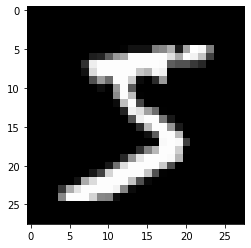

In [35]:
#각 객체는 28by 28 2차원 데이터입니다.  
#0 ~ 255사이의 값을 가지며 픽셀의 밝기를 나타냅니다.

import numpy as np 
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.cm.gray)

In [36]:
#데이터 shape 확인
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


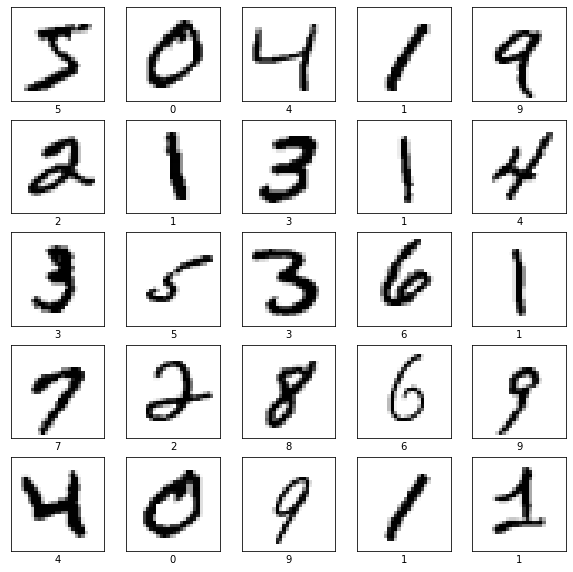

In [37]:
#데이터 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

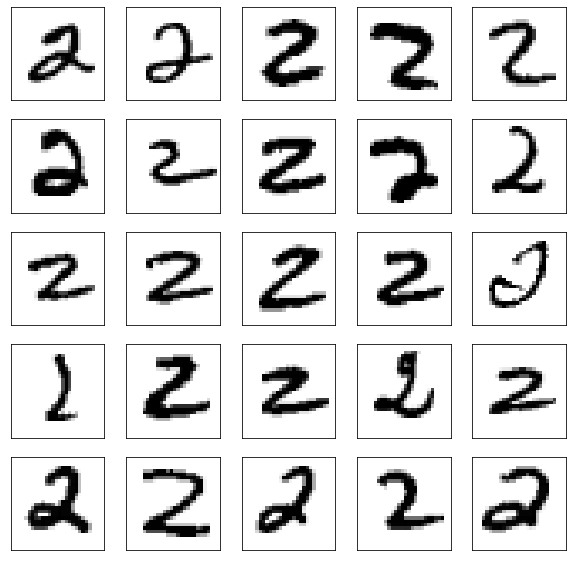

In [38]:
#라벨이 2인 데이터 출력하기
import numpy as np
idx = np.where(train_labels == 2)[0]

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[idx[i]], cmap=plt.cm.binary)

Sequential API를 이용한 MLP모델 만들기

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [40]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(60, activation = "relu"),
    layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

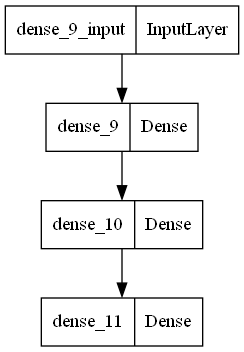

In [42]:
#plot_model을 활용하여 신경망 시각화  
#show_shape = True를 이용해 입출력 데이터의 shape을 표시할 수 있다.

from tensorflow.keras.utils import plot_model

plot_model(model)

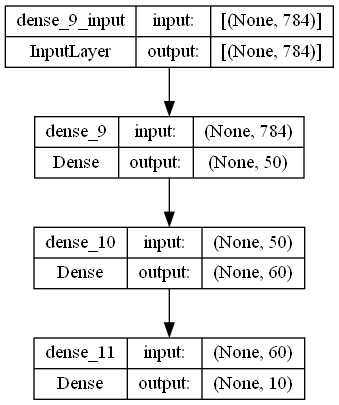

In [43]:
plot_model(model, show_shapes=True)

In [44]:
#데이터 스케일링, flatten
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

In [45]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4190 - accuracy: 0.8818
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1845 - accuracy: 0.9471
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1355 - accuracy: 0.9600
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9675
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9735


In [46]:
#스케일링 되지 않은 데이터로 진행한다면?
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [47]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 8.9924 - accuracy: 0.9524
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 2.5410 - accuracy: 0.9661
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5250 - accuracy: 0.9722
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.0984 - accuracy: 0.9751
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9352 - accuracy: 0.9769


In [48]:
#to_categorical를 이용해 원 핫 인코딩

from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
#원핫 인코딩을 loss function을 `categorical_crossentropy`로 설정해야한다.

model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

history = model.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4195 - accuracy: 0.8871
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2160 - accuracy: 0.9386
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1678 - accuracy: 0.9514
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9596
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9643


In [50]:
history.history

{'loss': [0.41945329308509827,
  0.21600255370140076,
  0.1678389310836792,
  0.14084790647029877,
  0.12158262729644775],
 'accuracy': [0.88714998960495,
  0.9386333227157593,
  0.9514333605766296,
  0.9596333503723145,
  0.9643166661262512]}

모델평가

In [51]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

model = Sequential([
    layers.Dense(512, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2565 - accuracy: 0.9275
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1029 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9798


test_acc: 0.9797999858856201


In [52]:
predictions = model.predict(test_images)
print(predictions[0])
confusion = np.zeros((10,10), dtype=int)

for k in range(len(test_images)):
    i = test_labels[k]
    j = np.argmax(predictions[k])
    confusion[i][j] += 1
    
print(confusion)

313/313 [==============================] - 0s 1ms/step
[2.3438433e-09 2.7775938e-11 1.1204835e-06 1.2022139e-05 2.9986970e-12 4.8561715e-09 1.0485727e-14 9.9998605e-01 2.1320277e-08 8.0700539e-07]
[[ 970    0    0    1    2    0    3    1    3    0]
 [   0 1120    2    2    0    1    3    3    4    0]
 [   5    1  999    4    2    0    2   14    5    0]
 [   0    0    4  992    0    2    0    4    3    5]
 [   0    0    3    1  962    0    3    2    2    9]
 [   3    0    0    5    1  872    4    1    4    2]
 [   2    3    0    1    4    5  943    0    0    0]
 [   1    0    6    2    0    0    0 1015    1    3]
 [   2    1    3    5    4    4    2    4  943    6]
 [   1    2    0    3    7    4    2    8    0  982]]


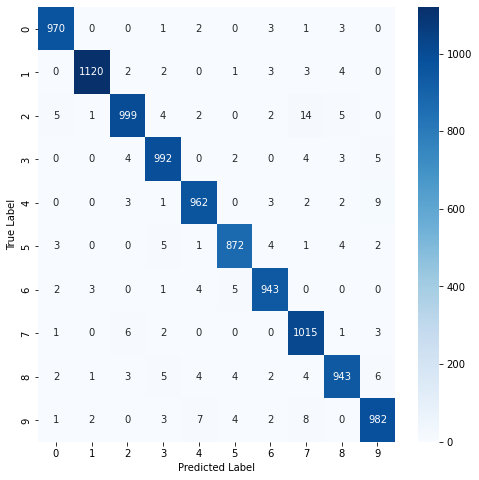

In [53]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision, Recall, F1-Score를 출력  
- TP : True Posive, FP : False Positive, TN : True Negative, FN : False Negative
- $\rm Precision = {TP \over TP+FP}$
- $\rm Recall = {TP \over TP+FN}$
- $\rm {1 \over F1-Score} = {1 \over 2}\left({1 \over Precision} + {1 \over F1-Score}\right)$
- support : 라벨 개수

In [54]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.99      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



------------
# Fashion MNIST
>28x28 크기의 흑백 의류 이미지로 이루어진 데이터셋입니다. 10개의 클래스 중 하나로 각각의 이미지가 분류됩니다. 이 데이터셋은 MNIST 데이터셋과 유사하지만 의류 이미지 분류 문제를 해결하는 데 사용됩니다.

케라스 모듈에서 Fashion MNIST 데이터셋을 로드  
MLP를 이용해 다중분류를 진행

In [55]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [56]:
#0부터 9까지의 라벨은 다음과 같은 패션 아이템과 대응합니다.

import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

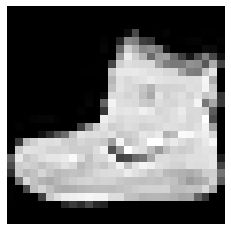

In [57]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.show()

In [58]:
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [59]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


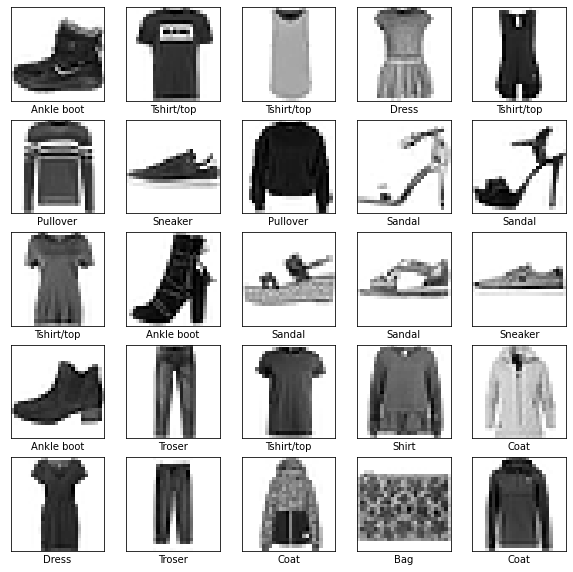

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [61]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255 

In [62]:
model = Sequential([
    layers.Dense(512, input_shape=(784,), activation = "relu"),
    layers.Dense(10, activation = "softmax") 
])

model.compile(optimizer="RMSprop",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

In [63]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)


print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5529 - accuracy: 0.8025
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3794 - accuracy: 0.8613
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3355 - accuracy: 0.8757
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3110 - accuracy: 0.8841
Epoch 5/5
313/313 [==============================] - 0s 782us/step - loss: 0.3476 - accuracy: 0.8788
test_acc: 0.8787999749183655


313/313 [==============================] - 0s 664us/step
[9.6108408e-08 3.0788452e-10 7.1690914e-10 2.0640879e-10 5.9017025e-10 4.8890482e-03 5.0106351e-08 8.0886893e-03 4.1043324e-07 9.8702174e-01]


Text(0.5, 0, 'Ankle boot')

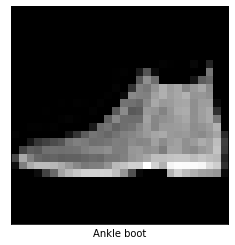

In [64]:
predictions = model.predict(test_images)
print(predictions[0])

plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[test_labels[0]])

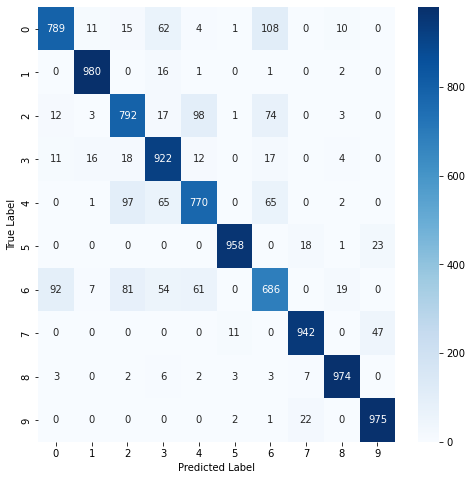

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       0.96      0.98      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.81      0.92      0.86      1000
           4       0.81      0.77      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.94      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8,8))
confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

Tshirt/top→Shirt


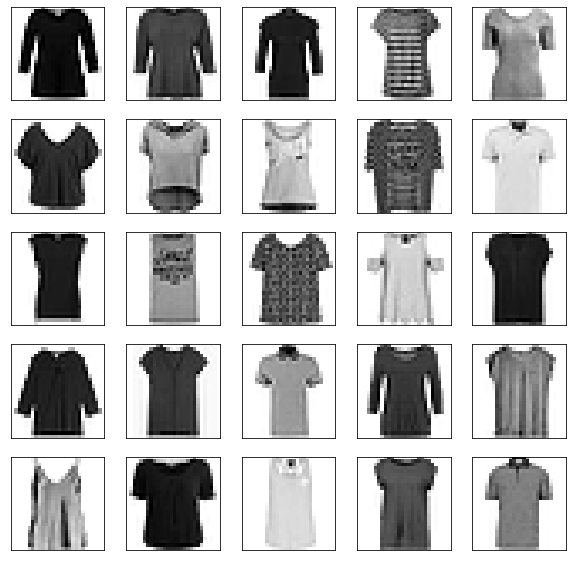

In [66]:
#가장 많이 착각한 패션 아이템 시각회

for i in range(10):
    confusion[i][i]=0

true=np.argmax(confusion)//10
answer=np.argmax(confusion)%10
print(str(class_names[true])+"→"+str(class_names[answer]))

idx=[]

for i in range(len(test_images)):
    if test_labels[i]==true and np.argmax(predictions[i])==answer:
        idx.append(i)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(test_images[idx[i]].reshape(28,28), cmap=plt.cm.binary)

------
# CIFAR10
>32x32 크기의 컬러 이미지로 이루어진 데이터셋입니다. 10개의 클래스로 이루어져 있으며, 각각의 클래스는 비슷한 속성을 가진 이미지들로 구성되어 있습니다. CIFAR-10은 MNIST와 Fashion MNIST와 달리 컬러 이미지 분류 문제를 해결하는 데 사용됩니다.


케라스 모듈에서 CIFAR10 데이터셋을 로드

In [67]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [68]:
#3차원의 rgb채널을 가지는 데이터이기 때문에 numberic한 식별이 어렵다.

print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


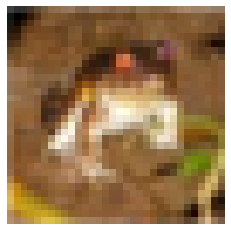

[6]


In [69]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0])
plt.show()
print(train_labels[0])

In [70]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

In [71]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


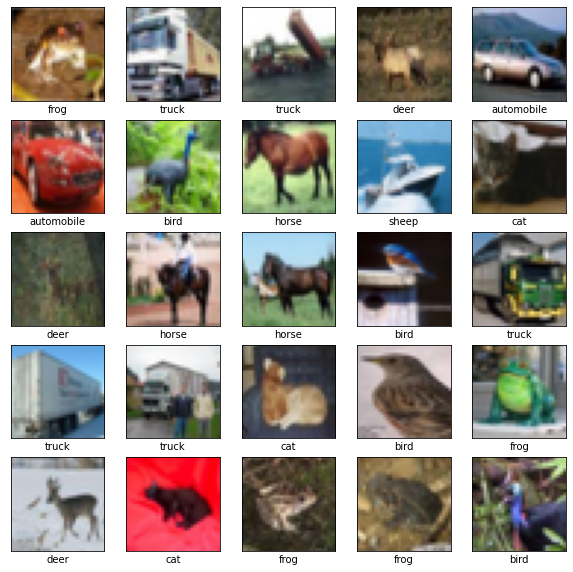

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [73]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

In [74]:
model = Sequential([
    layers.Dense(512, input_shape=(32 * 32 * 3,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(train_images, train_labels, epochs=15, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

Epoch 1/15
391/391 [==============================] - 8s 19ms/step - loss: 2.3778 - accuracy: 0.2486
Epoch 2/15
391/391 [==============================] - 7s 19ms/step - loss: 1.8218 - accuracy: 0.3471
Epoch 3/15
391/391 [==============================] - 7s 18ms/step - loss: 1.7196 - accuracy: 0.3875
Epoch 4/15
391/391 [==============================] - 7s 19ms/step - loss: 1.6610 - accuracy: 0.4138
Epoch 5/15
391/391 [==============================] - 8s 20ms/step - loss: 1.6154 - accuracy: 0.4294
Epoch 6/15
391/391 [==============================] - 7s 17ms/step - loss: 1.5805 - accuracy: 0.4409
Epoch 7/15
391/391 [==============================] - 6s 16ms/step - loss: 1.5515 - accuracy: 0.4520
Epoch 8/15
391/391 [==============================] - 8s 20ms/step - loss: 1.5270 - accuracy: 0.4606
Epoch 9/15
391/391 [==============================] - 7s 19ms/step - loss: 1.5068 - accuracy: 0.4677
Epoch 10/15
391/391 [==============================] - 7s 17ms/step - loss: 1.4872 - accura

----
# CIFAR100
>32x32 크기의 이미지를 100개의 클래스로 분류하도록 되어 있습니다.
CIFAR-100 데이터셋의 클래스는 크게 20개의 초목, 20개의 동물, 20개의 자동차, 20개의 비행기, 그리고 20개의 물고기로 구성되어 있습니다. 각 클래스는 600개의 이미지로 이루어져 있습니다.
CIFAR-100 데이터셋은 컴퓨터 비전 분야에서 이미지 분류 모델의 성능을 평가하고 비교하는데 널리 사용됩니다. 이 데이터셋은 딥러닝 모델의 학습과 평가를 위한 벤치마크로 사용되며, 최신 딥러닝 모델의 성능을 비교하는 대회에서도 종종 사용됩니다.

In [75]:
from tensorflow.keras.datasets import cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [76]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


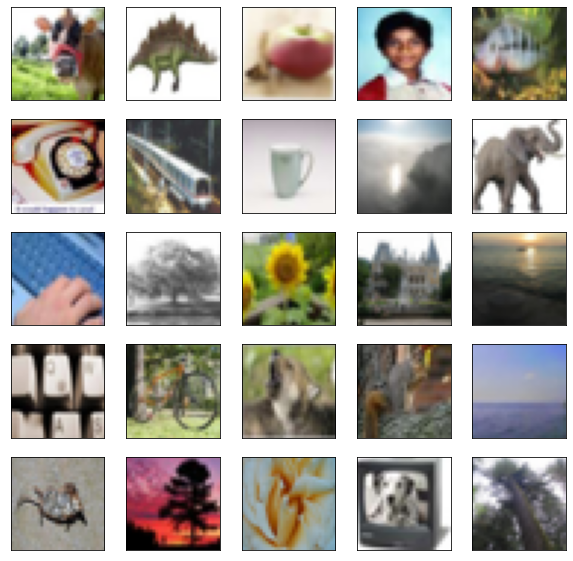

In [77]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.xlabel(class_names[train_labels[i]])

In [78]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

In [79]:
model = Sequential([
    layers.Dense(512, input_shape=(32 * 32 * 3,), activation="relu"),
    layers.Dense(100, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(train_images, train_labels, epochs=15, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 4.3280 - accuracy: 0.0622
Epoch 2/15
391/391 [==============================] - 6s 17ms/step - loss: 3.8222 - accuracy: 0.1200
Epoch 3/15
391/391 [==============================] - 6s 17ms/step - loss: 3.6683 - accuracy: 0.1489
Epoch 4/15
391/391 [==============================] - 7s 17ms/step - loss: 3.5738 - accuracy: 0.1648
Epoch 5/15
391/391 [==============================] - 7s 19ms/step - loss: 3.5022 - accuracy: 0.1772
Epoch 6/15
391/391 [==============================] - 7s 18ms/step - loss: 3.4437 - accuracy: 0.1896
Epoch 7/15
391/391 [==============================] - 7s 17ms/step - loss: 3.3944 - accuracy: 0.1987
Epoch 8/15
391/391 [==============================] - 7s 18ms/step - loss: 3.3517 - accuracy: 0.2075
Epoch 9/15
391/391 [==============================] - 7s 17ms/step - loss: 3.3187 - accuracy: 0.2143
Epoch 10/15
391/391 [==============================] - 7s 17ms/step - loss: 3.2860 - accura